In [8]:
import pandas as pd

In [9]:
train = pd.read_csv("train_clean_stem.csv", sep=';',index_col=0)

In [10]:
compteur0_5 = 0 
compteur1 = 0
compteur1_5 = 0
compteur3 = 0
compteur3_5 = 0
compteur4 = 0
compteur5 = 0
lst = []
for i in range(train.shape[0]):
    if i%100000 ==0: print(i)
    notei = train.iloc[i]['note']
    
    if notei == "0,5" :
        #resampled = resampled.append({'commentaire_stemmed': train.iloc[i]['commentaire_stemmed'], 'note':train.iloc[i]['note']}, ignore_index=True)
        lst.append(i)
        compteur0_5+=1
        if compteur0_5 % 2 ==0:
            lst.append(i)
    
    if notei == "1,0":
        compteur1+=1
        lst.append(i)
        if compteur1 %3 !=0:
            lst.append(i)

    if notei == "1,5":
            lst.append(i)
            lst.append(i)
            
    if notei == "2,0":

        lst.append(i)
    if notei=="2,5":
        lst.append(i)
    if notei == "4,5":
        lst.append(i)
    if notei=="5,0":
        compteur5+=1
        if compteur5 %10 !=0:
            lst.append(i)
    if notei == "3,0":
        compteur3+=1
        if compteur3 % 3 !=0:
            #resampled = resampled.append({'commentaire_stemmed': train.iloc[i]['commentaire_stemmed'], 'note':train.iloc[i]['note']}, ignore_index=True)
            lst.append(i)
    if notei == "3,5":
        compteur3_5+=1
        if compteur3_5 % 3 !=0:
            #resampled = resampled.append({'commentaire_stemmed': train.iloc[i]['commentaire_stemmed'], 'note':train.iloc[i]['note']}, ignore_index=True)
            lst.append(i)
    if notei == "4,0":
        compteur4+=1
        if compteur4 % 2 ==0:
            #resampled = resampled.append({'commentaire_stemmed': train.iloc[i]['commentaire_stemmed'], 'note':train.iloc[i]['note']}, ignore_index=True)
            lst.append(i)
    
    


0
100000
200000
300000
400000
500000
600000


In [11]:
import io
encoding = 'utf-8'
print(lst[-20:])

with open("train_clean_stem_eq.csv", 'w+',encoding=encoding) as file:
    file.write('index;note;commentaire_stemmed\n')
    for i in range(len(lst)):
        if i %10000==0:
            print(i)
        file.write(str(i)+";"+train.iloc[lst[i]]['note']+";"+train.iloc[lst[i]]['commentaire_stemmed']+"\n")


[665930, 665931, 665932, 665933, 665933, 665934, 665935, 665937, 665938, 665939, 665940, 665940, 665941, 665942, 665943, 665944, 665944, 665945, 665947, 665948]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000


5,0    68309
3,5    64962
4,5    64295
3,0    62735
4,0    62327
2,5    58719
0,5    57553
2,0    55285
1,5    53898
1,0    50394
Name: note, dtype: int64
4,0    124654
3,5     97443
3,0     94102
5,0     75898
4,5     64295
2,5     58719
2,0     55285
0,5     38369
1,0     30236
1,5     26949
Name: note, dtype: int64
[57553, 50394, 53898, 55285, 58719, 62735, 64962, 62327, 64295, 68309]
[38369, 30236, 26949, 55285, 58719, 94102, 97443, 124654, 64295, 75898]


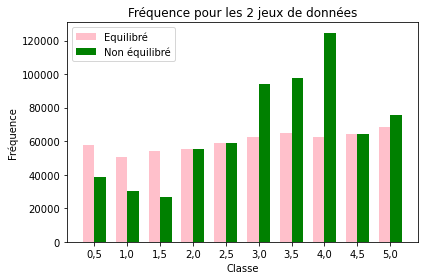

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

traineq = pd.read_csv("train_clean_stem_eq.csv", sep=';',index_col=0)
lst_eq = traineq['note'].value_counts()
lst_tr = train['note'].value_counts()
print(lst_eq)
print(lst_tr)
labels = ["0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"]
y_eq = []
y_tr = []
for i in labels:
    y_eq.append(lst_eq[i])
    y_tr.append(lst_tr[i])
print(y_eq)
print(y_tr)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_eq, width,color="pink", label='Equilibré')
rects2 = ax.bar(x + width/2, y_tr, width,color="green", label='Non équilibré')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fréquence')
ax.set_xlabel('Classe')
ax.set_title('Fréquence pour les 2 jeux de données')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

#plt.show()
plt.savefig("wesh.png",dpi=200)